In [9]:
import urllib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score 
from datetime import datetime, timedelta

## Teams Communication log

In [10]:
TeamsLogUrl=("https://www.dropbox.com/s/tk9q2z34e8nyiqq/Teams%20Communication%20log.txt?dl=1")
file = urllib.request.urlopen(TeamsLogUrl)

In [11]:
for line in file:
    decoded_line = line.decode("utf-8")
    print(decoded_line)

Andrew Bashorum  2:49 PM

Well we’ll use this to use as a document for Greg.

2:50

I’m not in the college again until Friday ignas but I’d say if you’ve any ideas out them in here.

2:51

I found good data sets for - the wages of data scientists, Stocks, bitcoin / dodgecoin prices.



ignas 岩石  3:12 PM

Yea no problem. I have a earth quake data set 20k rows and we could predict when/where the next earthquake is going to happen, how strong is it going to be

3:13

this one is pretty good https://www.kaggle.com/blastchar/telco-customer-churn



kaggle.comkaggle.com

Telco Customer Churn

Focused customer retention programs



Andrew Bashorum  3:13 PM

That sounds good can you link the earthquake one?



ignas 岩石  3:13 PM

CSV 



earthQuake.csv

CSVDownload CSV





3:13

i just got the csv



Andrew Bashorum  3:15 PM

Perfect

3:18

The churn one would be nice and easy to code. We could just use linear regression. But which method could we use to predict earthquakes given those columns

# Section 1

Authour : Ignas Rocas, 

Student Nr: C00135830,

Purpose : CA1 Data Science ,

### Clean data

In [4]:
#Clean data
e_data = pd.read_csv("https://www.dropbox.com/s/ey2y94hyfclgl98/clean_data.csv?dl=1")
e_data.head()

,Unnamed: 0,Latitude,Longitude,Depth,Magnitude,Month,Day,Year,Country Name,Density,Population
0,0,19.246,145.616,131.6,6.0,1,2.0,1965.0,United States,21,194303000
1,39,53.008,-162.008,17.8,6.4,2,6.0,1965.0,United States,21,194303000
2,44,53.191,-161.859,22.5,6.3,2,6.0,1965.0,United States,21,194303000
3,57,21.527,143.081,340.0,5.6,2,17.0,1965.0,United States,21,194303000
4,86,53.292,-162.331,20.0,5.7,3,13.0,1965.0,United States,21,194303000


In [5]:
e_data.columns

Index(['Unnamed: 0', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Month',
       'Day', 'Year', 'Country Name', 'Density', 'Population'],
      dtype='object')

In [6]:
e_data['Year'] = e_data['Year'].apply(int)
e_data['Day'] = e_data['Day'].apply(int)

In [7]:

start = datetime(1965,1,1)
current = datetime(e_data['Year'][0], e_data['Month'][0], e_data['Day'][0], 0, 0)
s = int((current - start).total_seconds())

In [8]:
dates = list()
for i in range(len(e_data['Year'])):
    current = datetime(e_data['Year'][i], e_data['Month'][i], e_data['Day'][i], 0, 0)
    s = int((current - start).total_seconds())
    dates.append(s)
e_data['Date']=pd.Series(dates)
e_data.head()

,Unnamed: 0,Latitude,Longitude,Depth,Magnitude,Month,Day,Year,Country Name,Density,Population,Date
0,0,19.246,145.616,131.6,6.0,1,2,1965,United States,21,194303000,86400
1,39,53.008,-162.008,17.8,6.4,2,6,1965,United States,21,194303000,3110400
2,44,53.191,-161.859,22.5,6.3,2,6,1965,United States,21,194303000,3110400
3,57,21.527,143.081,340.0,5.6,2,17,1965,United States,21,194303000,4060800
4,86,53.292,-162.331,20.0,5.7,3,13,1965,United States,21,194303000,6134400


In [ ]:
e_data['DATE'] = pd.to_datetime(e_data[['Year', 'Month','Day']])
e_data = e_data.drop(['Unnamed: 0','Month','Day','Year'],axis=1)
e_data.head()

# Corroletion matrix

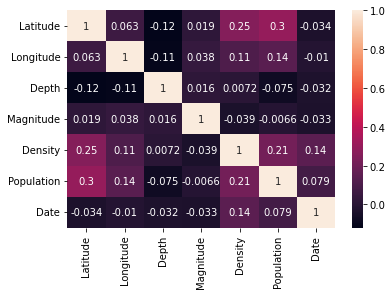

In [9]:
# Shows that the correletion bettween features are too great for Linear and Multi-Linear Regression
corrMatrix = e_data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:

y = e_data['Latitude'].values
X = e_data['Longitude'].values.reshape(-1,1)

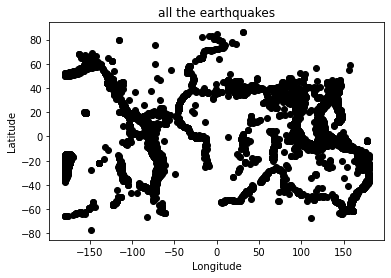

In [11]:
# just to see how the points look and clearly n
plt.scatter(X, y, color='black')
plt.title('all the earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Random forest

In [12]:
#separate data & split data
X = e_data[['Longitude', 'Latitude', 'Magnitude','Density']]
y = e_data['Date']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [13]:
#user random forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state = 42)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)

In [14]:
#random forest evaluation
print("Score : ", forest.score(X_test,y_test))
print("Mean squared error : ", mean_squared_error(y_test,pred))

Score :  0.8796747230646548
Mean squared error :  2.4312730361728324e+16


# DBSCAN Clustering (knns,decision trees)

In [15]:
df = e_data
df

,Latitude,Longitude,Depth,Magnitude,Country Name,Density,Population,Date,DATE
0,19.2460,145.6160,131.60,6.0,United States,21,194303000,86400,1965-01-02
1,53.0080,-162.0080,17.80,6.4,United States,21,194303000,3110400,1965-02-06
2,53.1910,-161.8590,22.50,6.3,United States,21,194303000,3110400,1965-02-06
3,21.5270,143.0810,340.00,5.6,United States,21,194303000,4060800,1965-02-17
4,53.2920,-162.3310,20.00,5.7,United States,21,194303000,6134400,1965-03-13
...,...,...,...,...,...,...,...,...,...
18720,6.1142,-82.5906,10.00,5.6,Panama,54,4037078,1636675200,2016-11-12
18721,-35.2021,54.0219,10.00,5.5,Madagascar,42,24894380,1638316800,2016-12-01
18722,11.0316,-60.9005,31.75,5.9,United Kingdom,271,65595565,1638748800,2016-12-06
18723,-10.1785,160.9149,10.00,6.0,Thailand,135,68971331,1639958400,2016-12-20


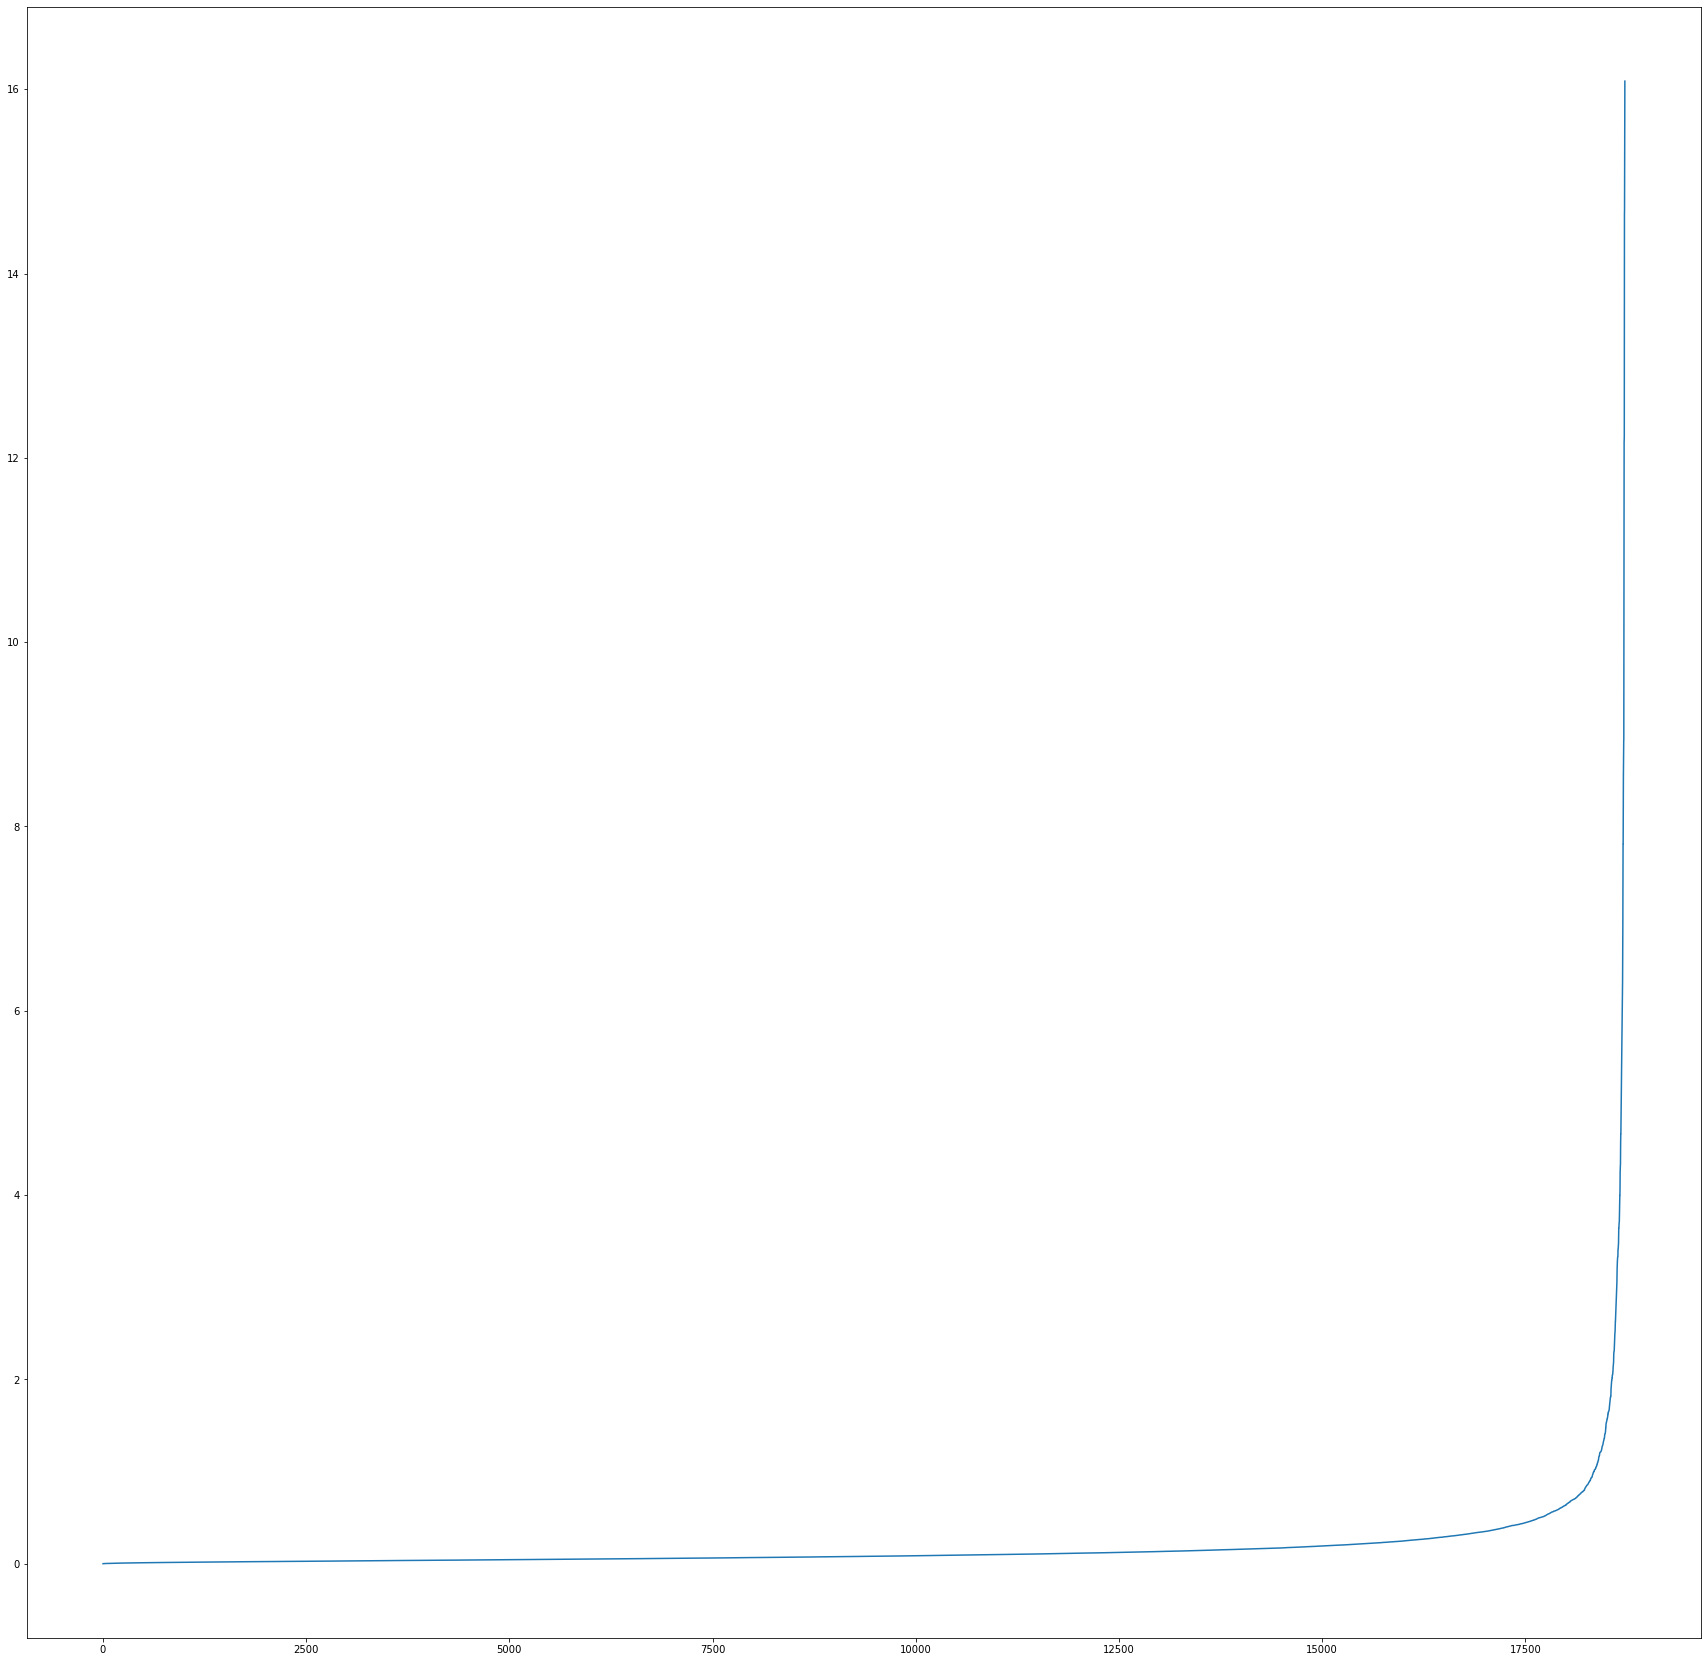

In [16]:
#https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
#followed article above which parameters to pick for DBSCAN

#used The k-nearest neighbors to pick the best eps for DBSCAN
neighbors = NearestNeighbors(n_neighbors=4)#neigbors set to min_samples
neighbors_fit = neighbors.fit(df[['Latitude','Longitude']])
distances, indices = neighbors_fit.kneighbors(df[['Latitude','Longitude']])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(30,30))
plt.plot(distances)
# show that best eps is close to 2

In [17]:
#user DBSCAN and save its labels to dataframe
dbscan=DBSCAN(eps=1.6,min_samples=4)
dbscan.fit_predict(df[['Longitude','Latitude']])
df['Cluster']=dbscan.labels_ 

In [18]:
#plot all the data
def plot(df):
    plt.scatter(df['Longitude'],df['Latitude'],c=df['Cluster'],cmap="viridis_r")
    plt.title('DBSCAN Clustering',fontsize=20)
    plt.xlabel('Longitude',fontsize=14)
    plt.ylabel('Latitude',fontsize=14)
    plt.show()

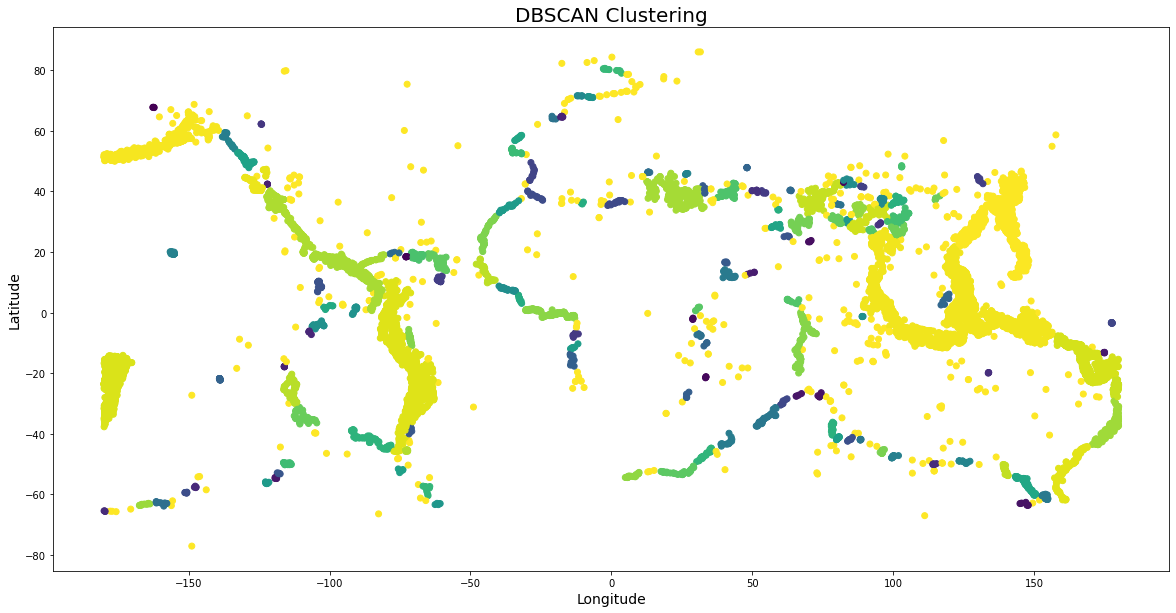

In [19]:
plt.figure(figsize=(20,10))
plot(df)

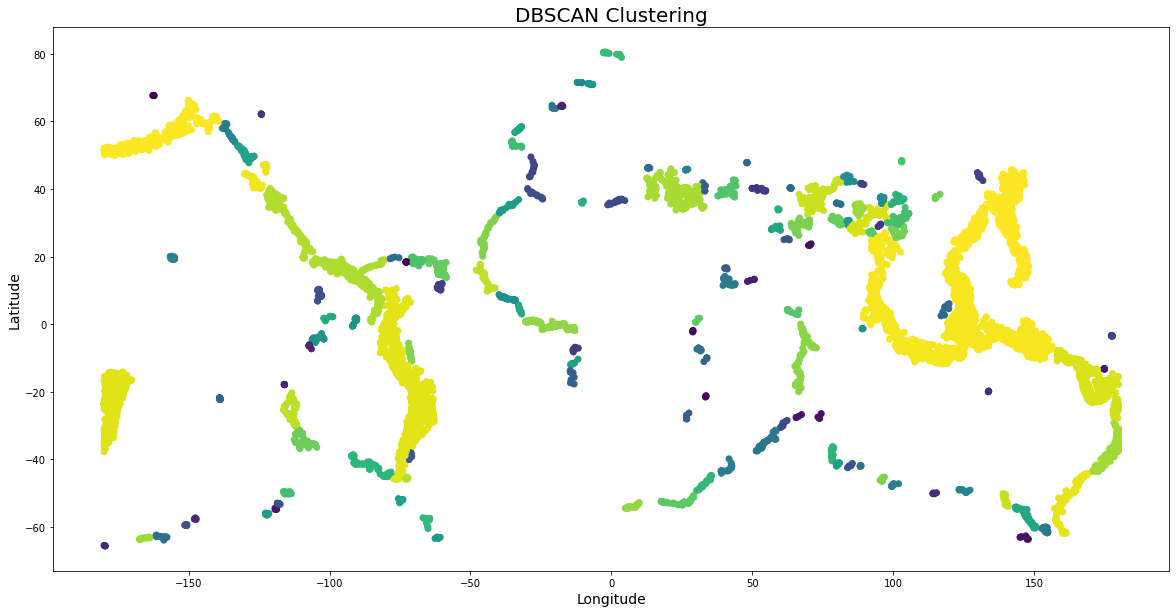

In [20]:
#get unique clusters and remove outliners
#(-1 lable,and any clusters with 1 element) - display the results

clusters = df['Cluster'].value_counts().index
clusters = list(clusters)
clusters.sort()
removeList = [-1,126]#126 has the same date in same cluster/ same location
temp =  [i for i in clusters if len(df[df.Cluster==i])<4]
removeList.extend(temp)

for i in removeList:
    if i in clusters:
        clusters.remove(i)
    
    
df = df[df['Cluster'].isin(clusters) == True]
plt.figure(figsize=(20,10))
plot(df)

In [21]:
df.head()

,Latitude,Longitude,Depth,Magnitude,Country Name,Density,Population,Date,DATE,Cluster
0,19.246,145.616,131.6,6.0,United States,21,194303000,86400,1965-01-02,0
1,53.008,-162.008,17.8,6.4,United States,21,194303000,3110400,1965-02-06,1
2,53.191,-161.859,22.5,6.3,United States,21,194303000,3110400,1965-02-06,1
3,21.527,143.081,340.0,5.6,United States,21,194303000,4060800,1965-02-17,0
4,53.292,-162.331,20.0,5.7,United States,21,194303000,6134400,1965-03-13,1


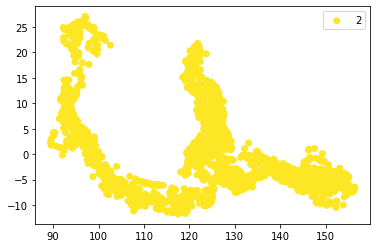

In [22]:
#get one cluster and display it
two = df[df.Cluster == 2]
plt.scatter(two['Longitude'],two['Latitude'],c=two['Cluster'],cmap="viridis_r")
plt.legend(two['Cluster'])
plt.show()

NOTES: So we get all the averages time in between the earthquakes for each of the cluster. Then we use Decetion trees to predict incomping new data (users location(longatude/latidue) => y(Cluster)) So we can derive the next earthquake data,from (previous know erthquake date)+(predicted average inbetween for that Cluster)

In [23]:
df[df.Cluster == 2].Cluster.iloc[0]

2

In [24]:
#calculate for each cluster the averate time inbetween the earthquakes 
avgCluDict = {}
for n in clusters:# --------all the unique cluster
    curCluster = df[df.Cluster == n]#-------------get each cluster
    curNumber = curCluster.Cluster.iloc[0] # get cluster number
    total=0
    count=0
    for x in range(len(curCluster)):
        a = curCluster['DATE'].iloc[x]
        x+=1
        if(x<len(curCluster)):
            b = curCluster['DATE'].iloc[x]
            total+= (b-a).total_seconds()
            count +=1
        x-=1
    if(total > 0 and count > 0):  
        #avgCluster.append(int(total/count))
        avgCluDict[curNumber]=int(total/count)
        
len(avgCluDict)#need create dictionary from cluster number and average

#append the new averages to dataframe
tempList = []
for row in df.iterrows():
    cluster = row[1]['Cluster']
    if(cluster in avgCluDict.keys()):
        tempList.append(avgCluDict[cluster])
df['DateAvg']=tempList


C:\Users\Ignas\AppData\Local\Temp/ipykernel_8000/721424052.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateAvg']=tempList


Use decision trees to predict cluster, when new data (latidude and logitude) comes in.

In [25]:
# split data
X = df[['Latitude','Longitude']]
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [26]:
# create a regressor object
dtr = DecisionTreeRegressor(random_state = 0) 
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)
y_pred=dtr.predict(X_test)

In [27]:
#get first prediction (cluster) & get acompaning average days
testCluster=y_pred[2]
sec = df[df.Cluster == int(testCluster)]['DateAvg'].iloc[0]

sec = timedelta(seconds=int(sec))
print(sec)

3 days, 16:59:20


In [28]:
#get last date of in that cluster & change to next earthquoke date
lastKnowDate=df[df.Cluster==int(testCluster)]['DATE'].iloc[-1] # 2016-12-20
new_datetime = lastKnowDate + sec
print("cluster : ",testCluster,"=>",new_datetime) # next earthquoke in the cluster 

cluster :  2.0 => 2016-08-27 16:59:20


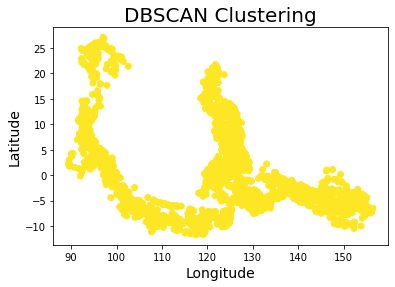

In [31]:
clu = df[df.Cluster==testCluster]
plot(clu)